In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import torch

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from molexplain.utils import MODELS_PATH, PROCESSED_DATA_PATH, DEVICE
from rdkit.Chem import MolFromInchi
from rdkit.Chem import MolFromSmiles
from molexplain.vis import molecule_importance

RDKit WARNING: [18:10:51] Enabling RDKit 2019.09.3 jupyter extensions
Using backend: pytorch


In [3]:
from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=46, edge_in_feats=10, global_feats=4, n_tasks=5).to(DEVICE) 
model.load_state_dict(torch.load(os.path.join(MODELS_PATH, "AZ_ChEMBL_MPNN.pt"), map_location=DEVICE))

inchis = np.load(os.path.join(PROCESSED_DATA_PATH, "inchis.npy"))

In [4]:
example_inchi = inchis[20]
print(example_inchi)

InChI=1S/C15H20F6N2O5/c1-7(5-10(24)27-12(2,3)4)22-11(25)8-6-9(28-23-8)13(26,14(16,17)18)15(19,20)21/h7,9,26H,5-6H2,1-4H3,(H,22,25)/t7-,9?/m0/s1


In [5]:
mol = MolFromInchi(example_inchi)

In [6]:
svg, atom_importance, edge_importance, global_importance = molecule_importance(mol,
                                                                               model,
                                                                               task=2,
                                                                               vis_factor=1)

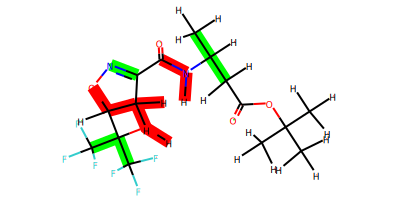

In [7]:
svg

In [8]:
atom_importance

array([ 2.5958628e-03,  2.2861816e-03,  2.2861816e-03,  2.2861816e-03,
        4.2654625e-03, -1.7121429e-02,  7.3087309e-04,  6.9965385e-03,
       -7.9760021e-03, -1.8478606e-02, -5.3659482e-03, -2.6179270e-03,
        5.2552405e-03,  1.8928634e-03,  1.8928634e-03, -4.0114978e-03,
       -4.0114978e-03, -4.0114978e-03, -4.0114978e-03, -4.0114978e-03,
       -4.0114978e-03, -8.9284609e-04,  6.5601945e-02,  1.8523896e-02,
        2.2895115e-04, -5.1157768e-03,  7.5483265e-05, -3.0082164e-03,
       -4.1572136e-04, -4.1572136e-04, -4.1572136e-04, -4.1649918e-04,
       -4.1649918e-04, -4.1649918e-04, -4.1649918e-04, -4.1649918e-04,
       -4.1649918e-04, -4.1649918e-04, -4.1649918e-04, -4.1649918e-04,
       -4.3638801e-04, -4.3638801e-04, -5.3490256e-04, -5.3490256e-04,
       -1.3454454e-03,  6.3219538e-04, -2.2272934e-04, -5.7739601e-04],
      dtype=float32)

In [9]:
edge_importance

array([-0.08852828, -0.05987171, -0.05987171, -0.05987171, -0.0883676 ,
        0.14850228, -0.18360895,  0.0230939 , -0.07916986,  0.19245438,
       -0.08698023,  0.23998387,  0.02742542,  0.08616737, -0.01708367,
       -0.04668588,  0.22429323, -0.01395256, -0.02973547, -0.02973547,
       -0.02275086, -0.02647839, -0.02647839, -0.02647839, -0.02647839,
       -0.02647839, -0.02647839,  0.05450417, -0.03322159, -0.03322159,
       -0.03322159, -0.03321834, -0.03321834, -0.03321834, -0.03321834,
       -0.03321834, -0.03321834, -0.03321834, -0.03321834, -0.03321834,
       -0.03330429, -0.03330429, -0.04407413, -0.04407413,  0.00565556,
        0.02743879,  0.00471724, -0.01357325], dtype=float32)

In [10]:
global_importance

array([ 0.11039182, -0.02195664,  0.69527835, -0.23680171], dtype=float32)

In [11]:
symmetric_sm = 'C1=CC=C(C=C1)C1=CC=C(C=C1)C1=CC=C(C=C1)C1=CC=CC=C1'
symmetric_mol = MolFromSmiles(symmetric_sm)

In [13]:
svg, atom_importance, edge_importance, global_importance = molecule_importance(symmetric_mol,
                                                                               model,
                                                                               n_steps=50,
                                                                               task=2,
                                                                               vis_factor=1)

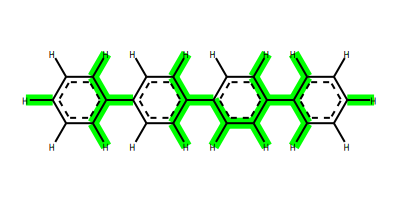

In [14]:
svg

In [15]:
atom_importance

array([ 2.2319455e-03, -2.6364294e-03,  3.5461556e-04,  4.2587235e-03,
        3.1041622e-04, -1.5385859e-04,  4.4890200e-03,  2.0402893e-02,
       -1.1598637e-03,  5.3430097e-03,  5.9298176e-04,  4.1551678e-03,
        3.9692544e-03,  2.0567896e-02, -5.9908896e-04,  4.9456190e-03,
       -2.7039909e-04,  4.1644913e-03,  3.0735810e-03,  2.1494005e-02,
        3.0298062e-05,  3.9711746e-04, -2.3663405e-04,  4.9448144e-03,
        1.7155095e-03,  1.7175557e-03,  1.7169776e-03,  1.7212764e-03,
        1.7182500e-03,  2.2751326e-03,  2.0041061e-03,  1.7943741e-03,
        1.7177740e-03,  2.2751109e-03,  2.0040995e-03,  1.7943738e-03,
        1.7177742e-03,  2.2752224e-03,  2.0038125e-03,  1.3590492e-03,
        1.7907219e-03,  1.7169776e-03], dtype=float32)

In [16]:
edge_importance

array([ 4.4139023e-03, -1.7995136e-02, -5.8794031e-03, -6.5711210e-03,
       -7.9729594e-03,  3.1712037e-02,  2.1923919e-01,  1.2293529e-02,
       -5.1008768e-02,  1.9622505e-04,  4.0182080e-03,  4.0485043e-02,
        2.0993629e-01,  9.8585319e-03, -4.7655169e-02,  1.3273053e-03,
        4.1647167e-03,  4.1899845e-02,  2.0572221e-01,  1.3791614e-02,
       -3.7060395e-02,  4.0867005e-04,  4.0579611e-03, -8.2876170e-03,
        1.5676258e-02,  1.5485637e-02,  1.4945758e-02,  2.2685558e-03,
        2.2718408e-03,  2.2705405e-03,  2.2695109e-03,  2.2727044e-03,
        1.0563318e-03,  1.8510802e-03,  2.0445888e-03,  2.2712834e-03,
        1.0560635e-03,  1.8510593e-03,  2.0445895e-03,  2.2712804e-03,
        1.0558466e-03,  1.8461064e-03,  1.7914203e-03,  2.0452135e-03,
        2.2705405e-03], dtype=float32)

In [17]:
global_importance

array([ 0.13010411,  0.01473565,  0.62599754, -0.18330163], dtype=float32)